In [1]:
import pandas as pd

# Define data types for columns to handle mixed types warning
data_types = {
    'titleId': str,
    'ordering': int,
    'title': str,
    'region': str,
    'language': str,
    'types': str,
    'attributes': str,
    'isOriginalTitle': str
}

# Read the CSV file with specified data types to handle mixed types warning
data = pd.read_csv('ImdbTitleAkas.csv', dtype=data_types, low_memory=False)

# Display the filtered rows
print(data)

# Count the number of rows in the filtered data
row_count = data.shape[0]


           titleId  ordering                      title region language  \
0        tt0000001         1                 Карменсіта     UA       \N   
1        tt0000001         2                 Carmencita     DE       \N   
2        tt0000001         3  Carmencita - spanyol tánc     HU       \N   
3        tt0000001         4                 Καρμενσίτα     GR       \N   
4        tt0000001         5                 Карменсита     RU       \N   
...            ...       ...                        ...    ...      ...   
1048570  tt0177858        23                    W lipcu     PL       \N   
1048571  tt0177858        24      Η Ιουλία τον Αύγουστο     GR       \N   
1048572  tt0177858        25                   En julio     UY       \N   
1048573  tt0177858         2                   Em Julho     PT       \N   
1048574  tt0177858         3                   През юли     BG       bg   

               types                  attributes isOriginalTitle  
0        imdbDisplay            

In [7]:
# Define data types
data_types = {
    'titleId': str,
    'ordering': int,
    'title': str,
    'region': str,
    'language': str,
    'types': str,
    'attributes': str,
    'isOriginalTitle': str
}

# Read the CSV file 
data = pd.read_csv('ImdbTitleAkas.csv', dtype=data_types, low_memory=False)

# Print information about the DataFrame
print(data.info())

# Check for null values in each column and print the number of null values along with their locations
for column in data.columns:
    null_count = data[column].isnull().sum()
    if null_count > 0:
        print(f"Column '{column}' has {null_count} null value(s).")
        null_locations = data[data[column].isnull()].index.tolist()
        print(f"Null value(s) located at index: {null_locations}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          1048575 non-null  object
 1   ordering         1048575 non-null  int64 
 2   title            1048575 non-null  object
 3   region           1048575 non-null  object
 4   language         1048575 non-null  object
 5   types            1048575 non-null  object
 6   attributes       1048575 non-null  object
 7   isOriginalTitle  1048575 non-null  object
dtypes: int64(1), object(7)
memory usage: 64.0+ MB
None


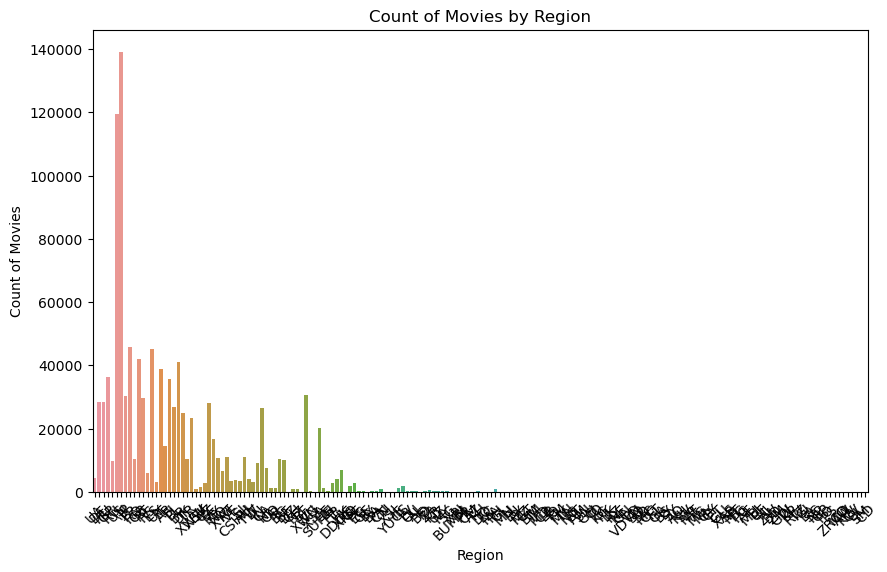

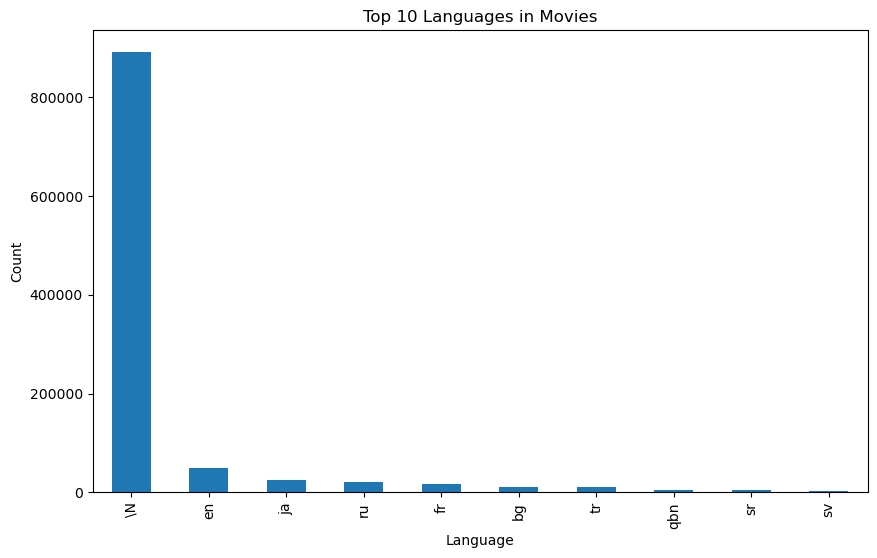

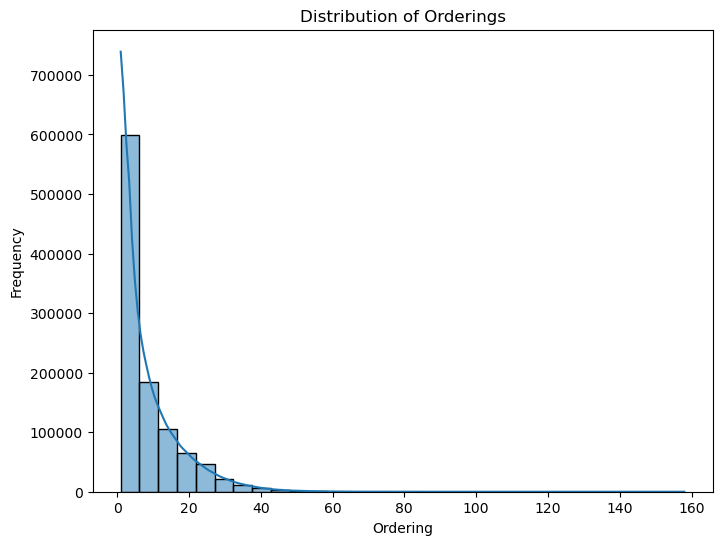

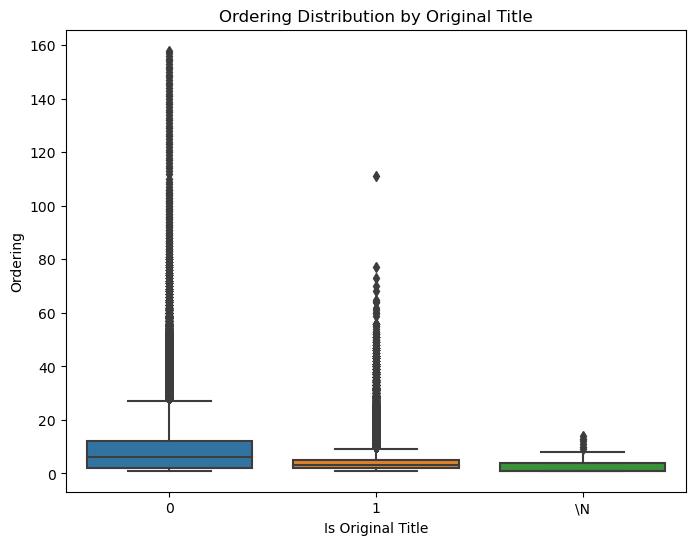

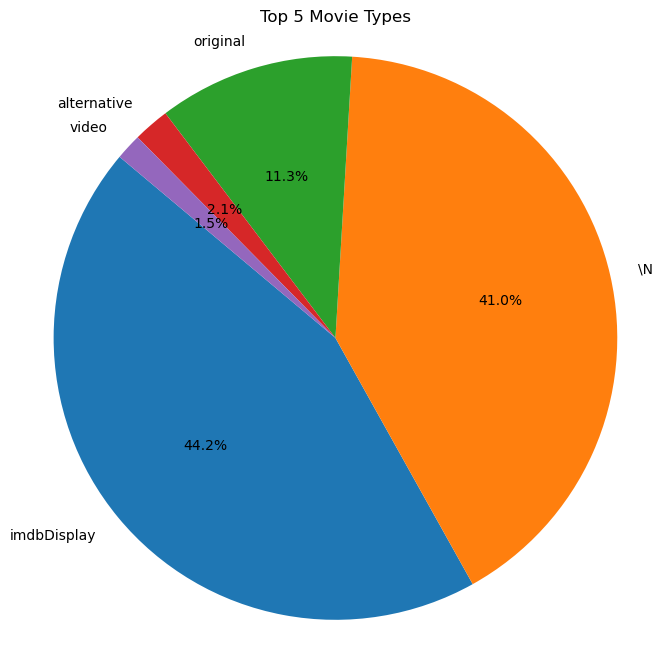

In [9]:
#Start with the initial 5 visualizations first, then adjust later.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define data types for columns to handle mixed types warning
data_types = {
    'titleId': str,
    'ordering': int,
    'title': str,
    'region': str,
    'language': str,
    'types': str,
    'attributes': str,
    'isOriginalTitle': str
}

# Read the CSV file with specified data types to handle mixed types warning
data = pd.read_csv('ImdbTitleAkas.csv', dtype=data_types, low_memory=False)

# EDA: Create 5 different plots

# 1. Count plot for 'region'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='region')
plt.title('Count of Movies by Region')
plt.xlabel('Region')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45)
plt.show()

# 2. Bar plot for top 10 languages
top_languages = data['language'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar')
plt.title('Top 10 Languages in Movies')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

# 3. Histogram for 'ordering'
plt.figure(figsize=(8, 6))
sns.histplot(data['ordering'], bins=30, kde=True)
plt.title('Distribution of Orderings')
plt.xlabel('Ordering')
plt.ylabel('Frequency')
plt.show()

# 4. Boxplot for 'ordering' by 'isOriginalTitle'
plt.figure(figsize=(8, 6))
sns.boxplot(x='isOriginalTitle', y='ordering', data=data)
plt.title('Ordering Distribution by Original Title')
plt.xlabel('Is Original Title')
plt.ylabel('Ordering')
plt.show()

# 5. Pie chart for types of movies
types_counts = data['types'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(types_counts, labels=types_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Movie Types')
plt.axis('equal')
plt.show()


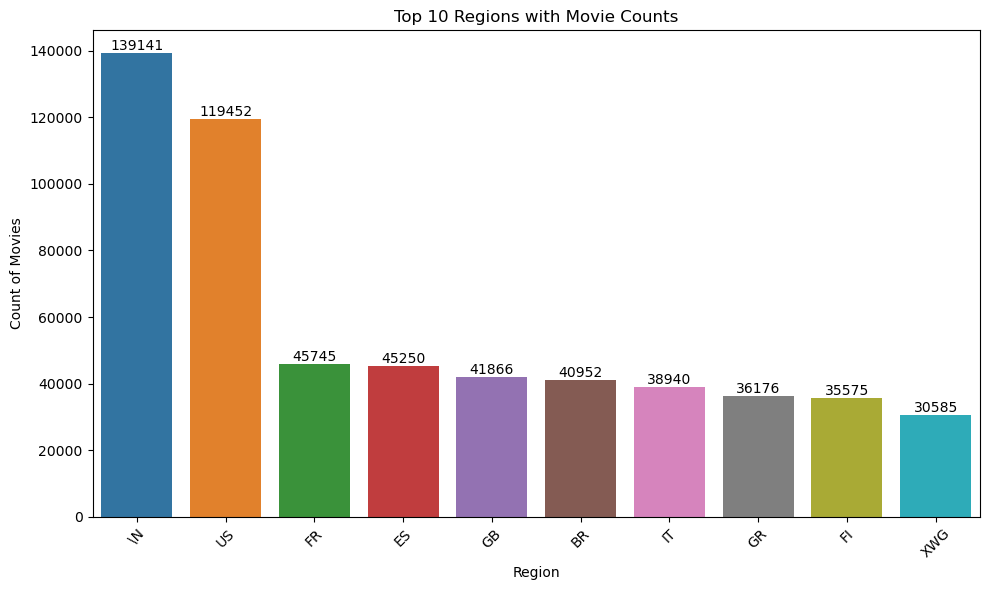

In [11]:
# Filter and get the top 10 regions
top_10_regions = data['region'].value_counts().head(10)

# Create a count plot for the top 10 regions
plt.figure(figsize=(10, 6))
sns.countplot(data=data[data['region'].isin(top_10_regions.index)], x='region', order=top_10_regions.index)
plt.title('Top 10 Regions with Movie Counts')
plt.xlabel('Region')
plt.ylabel('Count of Movies')

# Label the counts on the bars
for idx, value in enumerate(top_10_regions):
    plt.text(idx, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Drop the nulls, and lavel the regions as full names.

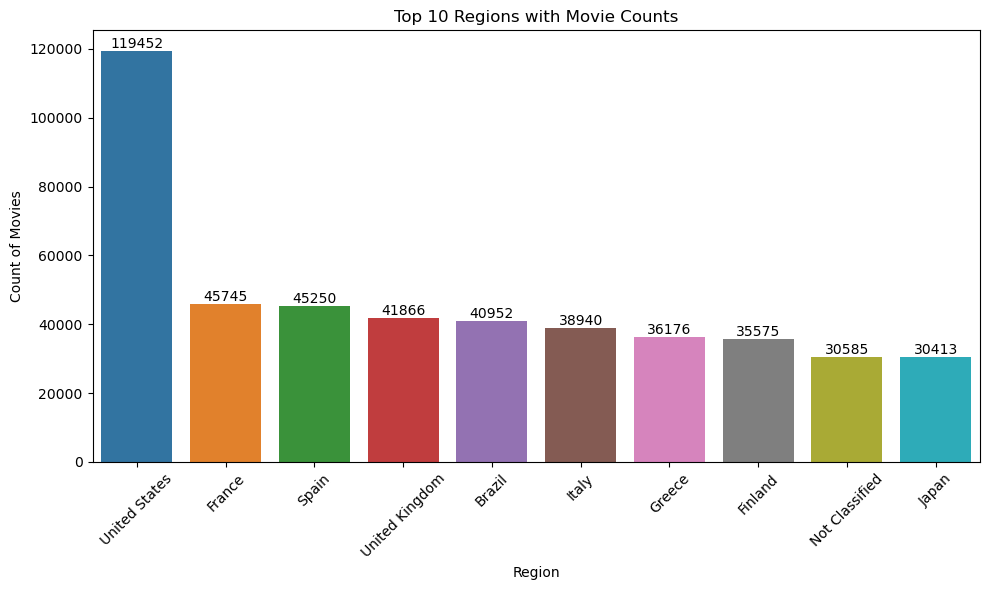

In [15]:
# Eliminate null values from 'region' column
data = data[data['region'] != r'\N']

# Mapping region codes to their corresponding full names
region_names = {
    'US': 'United States',
    'FR': 'France',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'BR': 'Brazil',
    'IT': 'Italy',
    'GR': 'Greece',
    'FI': 'Finland',
    'XWG': 'Not Classified',# In IMDb, XWG means not classified
    'JP': 'Japan'
}

# Replace region codes with their full names
data['region'].replace(region_names, inplace=True)

# Filter and get the top regions
top_regions = data['region'].value_counts().head(10)

# Create a count plot for the top regions
plt.figure(figsize=(10, 6))
sns.countplot(data=data[data['region'].isin(top_regions.index)], x='region', order=top_regions.index)
plt.title('Top 10 Regions with Movie Counts')
plt.xlabel('Region')
plt.ylabel('Count of Movies')

# Label the counts on the bars
for idx, value in enumerate(top_regions):
    plt.text(idx, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Refine the second graph: Bar plot for top 10 languages

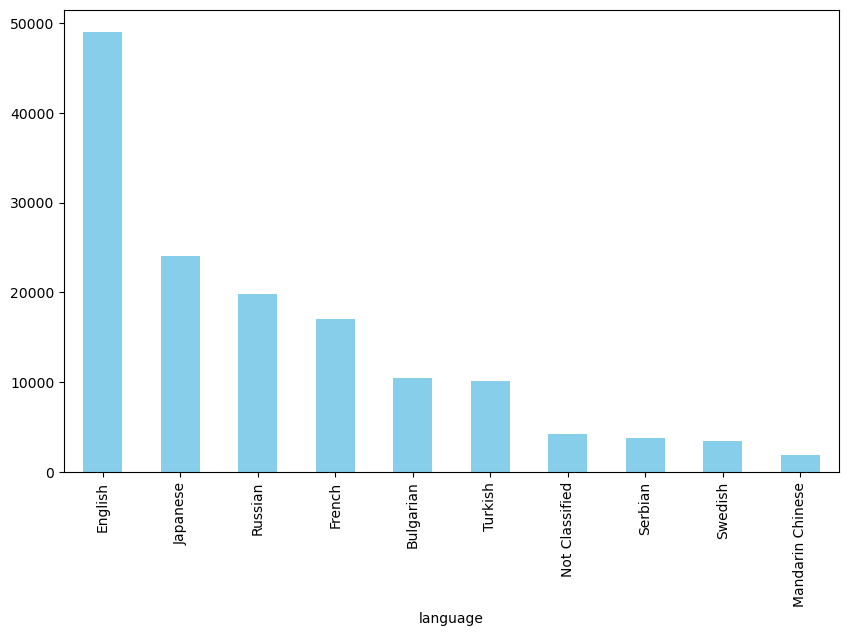

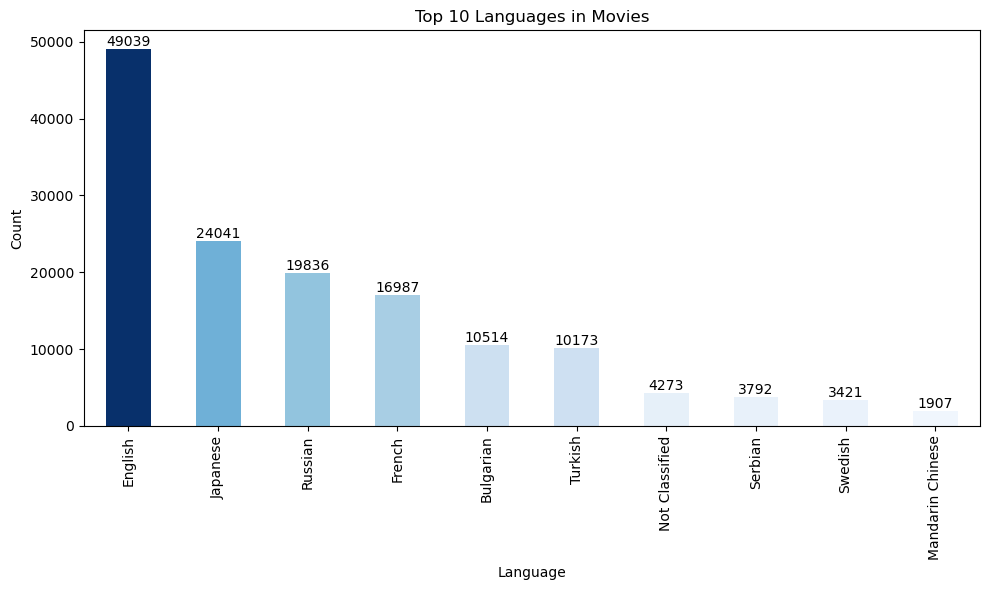

In [25]:
# Replace '\N' with NaN to handle null values
data['language'].replace(r'\N', pd.NA, inplace=True)

# Mapping language codes to their corresponding full names
language_names = {
    'en': 'English',
    'ja': 'Japanese',
    'ru': 'Russian',
    'fr': 'French',
    'bg': 'Bulgarian',
    'tr': 'Turkish',
    'Qbn': 'Not Classified',
    'sr': 'Serbian',
    'sv': 'Swedish',
    'cmn': 'Mandarin Chinese'
}

# Replace language codes with their full names
data['language'].replace(language_names, inplace=True)

# Filter out null values
data = data[data['language'].notnull()]

# Get the top 10 languages
top_languages = data['language'].value_counts().head(10)

# Create a bar plot for the top 10 languages
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar', color='skyblue')

# Create a gradient blue bar plot for the top 10 languages
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(top_languages.values / max(top_languages.values))
top_languages.plot(kind='bar', color=colors)

# Adding labels for counts
for index, value in enumerate(top_languages):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Top 10 Languages in Movies')
plt.xlabel('Language')
plt.ylabel('Count')
plt.tight_layout()

plt.show()


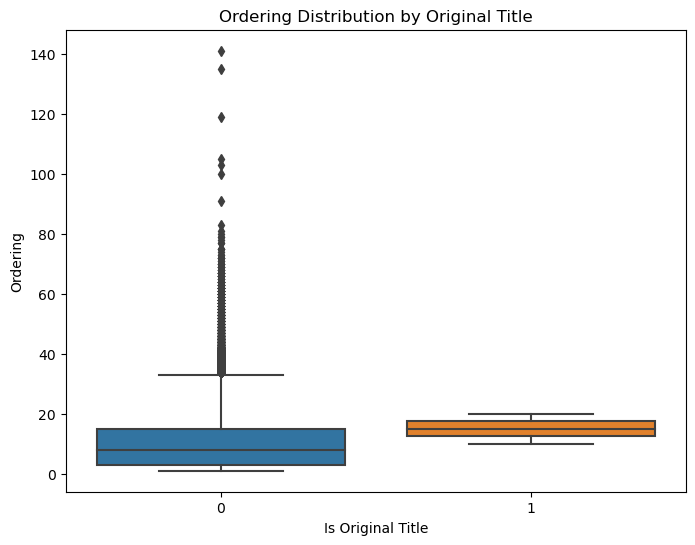

In [35]:
# 4. Boxplot for 'ordering' by 'isOriginalTitle'
plt.figure(figsize=(8, 6))
sns.boxplot(x='isOriginalTitle', y='ordering', data=data)
plt.title('Ordering Distribution by Original Title')
plt.xlabel('Is Original Title')
plt.ylabel('Ordering')
plt.show()

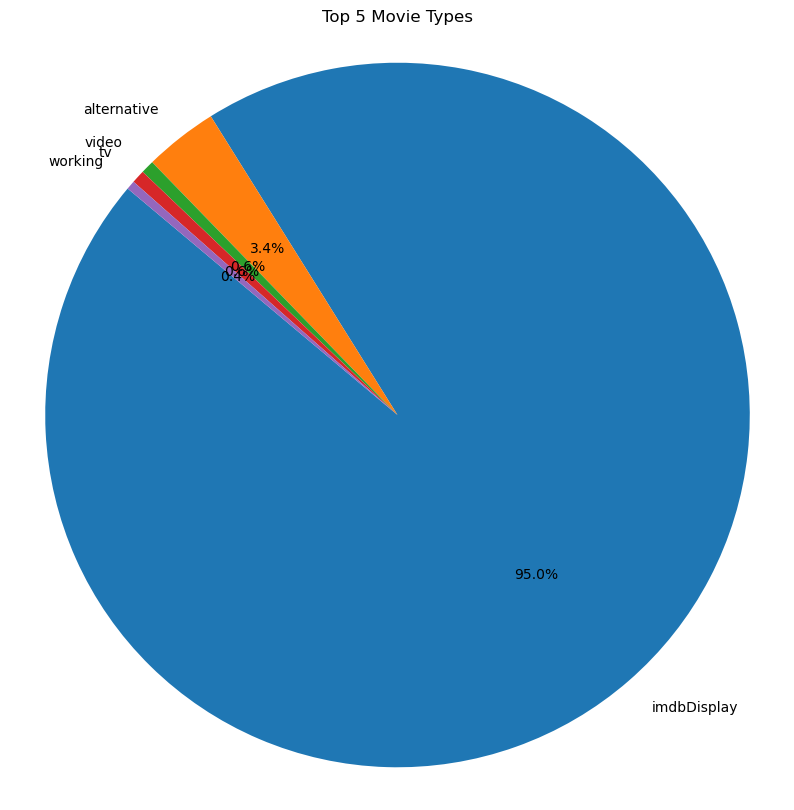

In [34]:
import matplotlib.pyplot as plt

# Eliminate null values from 'types' column in types_counts calculation
types_counts = data[data['types'] != r'\N']['types'].value_counts().head(5)

plt.figure(figsize=(10, 10))
plt.pie(types_counts, labels=types_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Movie Types')
plt.axis('equal')
plt.show()

According to the IMDb Non-Commercial Datasets, the "types" column in the "title.akas.tsv.gz" dataset refers to the enumerated set of attributes for alternative titles.

"IMDb Display Title": It represents the alternative title that is displayed on IMDb.

"Original": It represents the original title of the movie or TV show.

"Alternative": It represents an alternative title for the movie or TV show. It can include titles used for different regions or languages.